In [20]:
import numpy as np
import pandas as pd

### 1. Dataframe manipulation

#### 1.1. Adding a new column

Pandas dataframes are python's tables to store data in columns and rows. This dataframe contains information about 5 countries.

The data comes from https://www.worldometers.info/ 

Add a column containing the area of the countries in squared km:

- Germany: 357114

- Egypt: 1002450

- India: 3287590

- Brazil: 8515767

- Australia: 7692024


STEP 1: create a list called `areas` with the area of each country, separated by commas.

STEP 2: add this list as a column of the `pop_by_country` dataframe. Call the column `area_km2`.

In [21]:
# initial code

countries = ["Germany", "Egypt", "India", "Brazil", "Australia"]
populations = [83783942, 102334404, 1380004385, 212559417, 25499884]
gdps = [3693204332230, 235369129338, 2650725335364, 2053594877013, 1323421072479]

pop_by_country = pd.DataFrame({
    "country": countries,
    "population": populations,
    "gdp": gdps
})

pop_by_country

,country,population,gdp
0,Germany,83783942,3693204332230
1,Egypt,102334404,235369129338
2,India,1380004385,2650725335364
3,Brazil,212559417,2053594877013
4,Australia,25499884,1323421072479


In [22]:
# solution

countries = ["Germany", "Egypt", "India", "Brazil", "Australia"]

populations = [83783942, 102334404, 1380004385, 212559417, 25499884]
gdps = [3693204332230, 235369129338, 2650725335364, 2053594877013, 1323421072479]

# STEP 1
areas = [357114, 1002450, 3287590, 8515767, 7692024]

pop_by_country = pd.DataFrame({
    "country": countries,
    "population": populations,
    "gdp": gdps,
    "area_km2": areas # STEP 2
})

pop_by_country

,country,population,gdp,area_km2
0,Germany,83783942,3693204332230,357114
1,Egypt,102334404,235369129338,1002450
2,India,1380004385,2650725335364,3287590
3,Brazil,212559417,2053594877013,8515767
4,Australia,25499884,1323421072479,7692024


#### 1.2 Creating new columns from existing ones

The total gdp of a country doesn't tell us much about how wealthy the people living on it actually are. Let's add a new column with the gdp per capita instead

In [35]:
pop_by_country["gdp_per_capita"] = pop_by_country["gdp"] / pop_by_country["population"]

pop_by_country["gdp_per_capita"] = pop_by_country["gdp_per_capita"].astype("int")

#pop_by_country.sort_values(by="gdp_per_capita", ascending = False)

Nice! Now our dataframe is much more informative. Note that, in addition to adding the new column `gdp_per_capita`, we have also converted it to a different data type: integer. We do this to remove the decimals.

Your turn: we want to add a new column for the population density of each country.

STEP 1: create a column called "density", that contains the number of people per square kilometer.

STEP 2: convert this column data type to integer ("int").

In [24]:
# solution

# STEP 1
pop_by_country["density"] = pop_by_country["population"] / pop_by_country["area_km2"]

# STEP 2
pop_by_country["density"] = pop_by_country["density"].astype("int")

In [25]:
pop_by_country

,country,population,gdp,area_km2,gdp_per_capita,density
0,Germany,83783942,3693204332230,357114,44080,234
1,Egypt,102334404,235369129338,1002450,2300,102
2,India,1380004385,2650725335364,3287590,1920,419
3,Brazil,212559417,2053594877013,8515767,9661,24
4,Australia,25499884,1323421072479,7692024,51899,3


### 2. Dataviz tweaking and interpretation

We have recorded the heigh of 40 adults of a group. Drawing a histogram will help us understand the heigh distribution of this group with a simple glance. A histogram orders data points ascendingly and groups them into bins, which are represented by contiguous columns. It's really helpful to interpret data... but only if we build it properly!

Right now, our histogram is grouping all the data points into only 3 big groups (bins). We need a bit more detail to understand what's going on in there. Also, the figure is quite small and the font of the labels for the heigh is unreadable.

- STEP 1: Group the data into 8 bins.

- STEP 2: Change the size of the plot to 8 by 6.

- STEP 3: Make the labels for the heights match the size of the labels for the frequency (size 14).

- STEP 4: Display a cleaner graph by removing the grid lines.

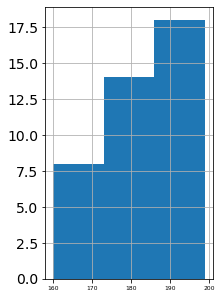

In [36]:
# initial code

heighs_list = pd.Series([184, 169, 191, 169, 181, 190, 177, 191, 195, 187, 172, 180, 178,
                         198, 199, 176, 189, 191, 185, 165, 170, 160, 192, 193, 174, 178,
                         189, 187, 182, 170, 189, 177, 180, 189, 169, 187, 198, 180, 186, 179])

heighs_list.hist(grid=True,
            bins=3,
            figsize=(3,5),
            ylabelsize=14,
            xlabelsize=6);

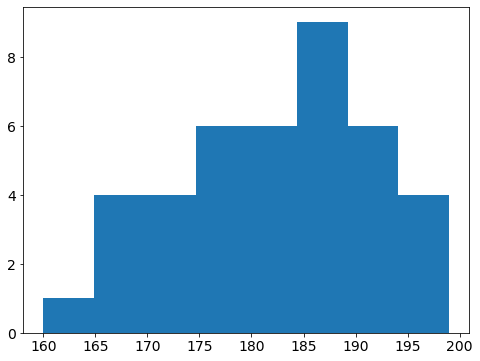

In [37]:
# solution

heighs_list = pd.Series([184, 169, 191, 169, 181, 190, 177, 191, 195, 187, 172, 180, 178,
                         198, 199, 176, 189, 191, 185, 165, 170, 160, 192, 193, 174, 178,
                         189, 187, 182, 170, 189, 177, 180, 189, 169, 187, 198, 180, 186, 179])

heighs_list.hist(grid=False,  # STEP 4
            bins=8,           # STEP 1
            figsize=(8,6),    # STEP 2
            ylabelsize=14,
            xlabelsize=14);   # STEP 3

### 3. Calculate the median

If you have a list of numbers and you order it ascendingly, the number that falls exactly in the middle is the **median**. It can aslo be called the "center of the distribution" or the "50th percentile".

What's the median form the following list?

In [38]:
list_of_numbers = [4, 2, 10, 3, 8, 9, 12, 1, 10]

In [39]:
# solution is 8
np.median(list_of_numbers)

8.0

Correct! The median is 8. What would be the median if we changed one of the numbers to something really extreme?

In [40]:
list_of_numbers_2 = [4, 2, 10, 3, 8, 9, 12, 1, 10000]

In [41]:
np.median(list_of_numbers_2)

8.0

Exactly, still 8! This is why the median is considered a _robust_ metric: it's not affected by a few extreme values. The mean, on the other side, jumped from `6.5` to `1116.5` from the first list to the second one!

### 4. Calculate the standard deviation of a population

A cohort of five students take a test, and their grades are `9`, `7`, `4`, `2`, `1` and `1`. The average grade is `4`, but some students seem to do really well, while others fail miserably. The teacher wants to have a measure for how disperse these numbers are.

The standard deviation measures exactly that: the typical distance between each data point and the mean.

The formula for the standard deviation of a population is the following:

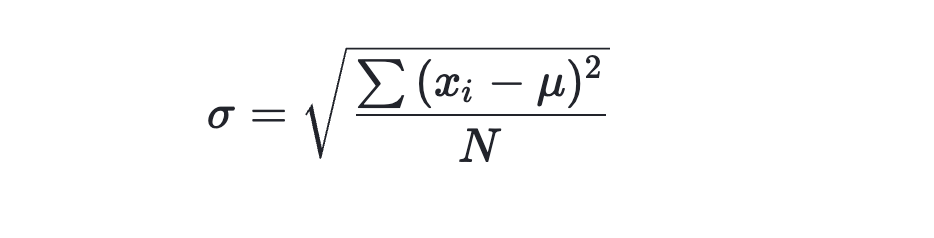

Learn more about the standard deviation here: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review 

Watch this video for a calculation of the formula by hand: https://www.youtube.com/watch?v=HvDqbzu0i0E 

Calculate the standard deviation for the grades of our cohort and round the result to the closest whole number (without any decimal).

You can do it by hand, using a calculator or any piece of software you have -- however, if you're using a function from a program (such as Excel or python), make sure it's using the same formula we're displaying here under the hood!

In [34]:
# the solution is 3 as shown by the following code

round(np.std([9, 7, 4, 2, 1, 1]))

3